In [1]:
import json
import random
import requests
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

from pathlib import Path
from config import api_key
from pandas import json_normalize
from scipy.stats import linregress


re_production = f"https://api.eia.gov/v2/seds/data/?api_key={api_key}&frequency=annual&data[0]=value&facets[stateId][]=AK&facets[stateId][]=AL&facets[stateId][]=AR&facets[stateId][]=AZ&facets[stateId][]=CA&facets[stateId][]=CO&facets[stateId][]=CT&facets[stateId][]=DC&facets[stateId][]=DE&facets[stateId][]=FL&facets[stateId][]=GA&facets[stateId][]=HI&facets[stateId][]=IA&facets[stateId][]=ID&facets[stateId][]=IL&facets[stateId][]=IN&facets[stateId][]=KS&facets[stateId][]=KY&facets[stateId][]=LA&facets[stateId][]=MA&facets[stateId][]=MD&facets[stateId][]=ME&facets[stateId][]=MI&facets[stateId][]=MN&facets[stateId][]=MO&facets[stateId][]=MS&facets[stateId][]=MT&facets[stateId][]=NC&facets[stateId][]=ND&facets[stateId][]=NE&facets[stateId][]=NH&facets[stateId][]=NJ&facets[stateId][]=NM&facets[stateId][]=NV&facets[stateId][]=NY&facets[stateId][]=OH&facets[stateId][]=OK&facets[stateId][]=OR&facets[stateId][]=PA&facets[stateId][]=RI&facets[stateId][]=SC&facets[stateId][]=SD&facets[stateId][]=TN&facets[stateId][]=TX&facets[stateId][]=US&facets[stateId][]=UT&facets[stateId][]=VA&facets[stateId][]=VT&facets[stateId][]=WA&facets[stateId][]=WI&facets[stateId][]=WV&facets[stateId][]=WY&facets[stateId][]=X3&facets[stateId][]=X5&facets[seriesId][]=REPRB&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000"
re_consumption = f"https://api.eia.gov/v2/seds/data/?api_key={api_key}&frequency=annual&data[0]=value&facets[stateId][]=AK&facets[stateId][]=AL&facets[stateId][]=AR&facets[stateId][]=AZ&facets[stateId][]=CA&facets[stateId][]=CO&facets[stateId][]=CT&facets[stateId][]=DC&facets[stateId][]=DE&facets[stateId][]=FL&facets[stateId][]=GA&facets[stateId][]=HI&facets[stateId][]=IA&facets[stateId][]=ID&facets[stateId][]=IL&facets[stateId][]=IN&facets[stateId][]=KS&facets[stateId][]=KY&facets[stateId][]=LA&facets[stateId][]=MA&facets[stateId][]=MD&facets[stateId][]=ME&facets[stateId][]=MI&facets[stateId][]=MN&facets[stateId][]=MO&facets[stateId][]=MS&facets[stateId][]=MT&facets[stateId][]=NC&facets[stateId][]=ND&facets[stateId][]=NE&facets[stateId][]=NH&facets[stateId][]=NJ&facets[stateId][]=NM&facets[stateId][]=NV&facets[stateId][]=NY&facets[stateId][]=OH&facets[stateId][]=OK&facets[stateId][]=OR&facets[stateId][]=PA&facets[stateId][]=RI&facets[stateId][]=SC&facets[stateId][]=SD&facets[stateId][]=TN&facets[stateId][]=TX&facets[stateId][]=US&facets[stateId][]=UT&facets[stateId][]=VA&facets[stateId][]=VT&facets[stateId][]=WA&facets[stateId][]=WI&facets[stateId][]=WV&facets[stateId][]=WY&facets[stateId][]=X3&facets[stateId][]=X5&facets[seriesId][]=RETCB&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000"

solar_consumption = f"https://api.eia.gov/v2/seds/data/?api_key={api_key}&frequency=annual&data[0]=value&facets[stateId][]=AK&facets[stateId][]=AL&facets[stateId][]=AR&facets[stateId][]=AZ&facets[stateId][]=CA&facets[stateId][]=CO&facets[stateId][]=CT&facets[stateId][]=DE&facets[stateId][]=FL&facets[stateId][]=GA&facets[stateId][]=HI&facets[stateId][]=IA&facets[stateId][]=ID&facets[stateId][]=IL&facets[stateId][]=IN&facets[stateId][]=KS&facets[stateId][]=KY&facets[stateId][]=LA&facets[stateId][]=MA&facets[stateId][]=MD&facets[stateId][]=ME&facets[stateId][]=MI&facets[stateId][]=MN&facets[stateId][]=MO&facets[stateId][]=MS&facets[stateId][]=MT&facets[stateId][]=NC&facets[stateId][]=ND&facets[stateId][]=NE&facets[stateId][]=NH&facets[stateId][]=NJ&facets[stateId][]=NM&facets[stateId][]=NV&facets[stateId][]=NY&facets[stateId][]=OH&facets[stateId][]=OK&facets[stateId][]=OR&facets[stateId][]=PA&facets[stateId][]=RI&facets[stateId][]=SC&facets[stateId][]=SD&facets[stateId][]=TN&facets[stateId][]=TX&facets[stateId][]=UT&facets[stateId][]=VA&facets[stateId][]=VT&facets[stateId][]=WA&facets[stateId][]=WI&facets[stateId][]=WV&facets[stateId][]=WY&facets[seriesId][]=SOTCB&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000"
coal_consumption = f"https://api.eia.gov/v2/seds/data/?api_key={api_key}&frequency=annual&data[0]=value&facets[stateId][]=AK&facets[stateId][]=AL&facets[stateId][]=AR&facets[stateId][]=AZ&facets[stateId][]=CA&facets[stateId][]=CO&facets[stateId][]=CT&facets[stateId][]=DE&facets[stateId][]=FL&facets[stateId][]=GA&facets[stateId][]=HI&facets[stateId][]=IA&facets[stateId][]=ID&facets[stateId][]=IL&facets[stateId][]=IN&facets[stateId][]=KS&facets[stateId][]=KY&facets[stateId][]=LA&facets[stateId][]=MA&facets[stateId][]=MD&facets[stateId][]=ME&facets[stateId][]=MI&facets[stateId][]=MN&facets[stateId][]=MO&facets[stateId][]=MS&facets[stateId][]=MT&facets[stateId][]=NC&facets[stateId][]=ND&facets[stateId][]=NE&facets[stateId][]=NH&facets[stateId][]=NJ&facets[stateId][]=NM&facets[stateId][]=NV&facets[stateId][]=NY&facets[stateId][]=OH&facets[stateId][]=OK&facets[stateId][]=OR&facets[stateId][]=PA&facets[stateId][]=RI&facets[stateId][]=SC&facets[stateId][]=SD&facets[stateId][]=TN&facets[stateId][]=TX&facets[stateId][]=UT&facets[stateId][]=VA&facets[stateId][]=VT&facets[stateId][]=WA&facets[stateId][]=WI&facets[stateId][]=WV&facets[stateId][]=WY&facets[seriesId][]=CLTCB&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000"

In [2]:
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept
    line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    plt.annotate(line_equation, text_coordinates, fontsize = 20, color="black")
    plt.title(title)
    plt.ylabel(y_label)
    plt.show()
    print(f'r:{r_value:.4f}')

In [3]:
file = Path("2015_GDP.csv")
gdp = pd.read_csv(file)
gdp_df = pd.DataFrame(gdp)
gdp_df = gdp_df.rename(columns={'GeoName': 'States', '2015': 'GDP_2015'})
gdp_df = gdp_df[['States', 'GDP_2015']]
gdp_df = gdp_df.set_index(['States'])
gdp_df.head()

GDP_2015
States                   
United States  18206023.0
Alabama          202372.4
Alaska            51490.9
Arizona          299393.3
Arkansas         117786.8

In [4]:
file2 = Path("industy GDP.csv")
gdp_co2 = pd.read_csv(file2)
gdp_co2_df = pd.DataFrame(gdp_co2)
gdp_co2_df = gdp_co2_df.rename(columns={'State': 'States'})
gdp_co2_df = gdp_co2_df[['States', 'GDP to CO2']]
gdp_co2_df = gdp_co2_df.set_index(['States'])
gdp_co2_df = gdp_co2_df.drop('District of Columbia')
gdp_co2_df.head()

GDP to CO2
States                    
Wyoming         599.550374
West Virginia   775.512320
North Dakota    966.746232
Louisiana      1267.053474
Montana        1432.577418

In [5]:
production_response = requests.get(re_production).json()
print(json.dumps(production_response, indent=4, sort_keys=True))

{
    "apiVersion": "2.1.4",
    "request": {
        "command": "/v2/seds/data/",
        "params": {
            "api_key": "ZPF1jah8ffGyCfFkuZ7eymimZsvCzcLkxVdB2Mk3",
            "data": [
                "value"
            ],
            "facets": {
                "seriesId": [
                    "REPRB"
                ],
                "stateId": [
                    "AK",
                    "AL",
                    "AR",
                    "AZ",
                    "CA",
                    "CO",
                    "CT",
                    "DC",
                    "DE",
                    "FL",
                    "GA",
                    "HI",
                    "IA",
                    "ID",
                    "IL",
                    "IN",
                    "KS",
                    "KY",
                    "LA",
                    "MA",
                    "MD",
                    "ME",
                    "MI",
                    "MN",
               

In [6]:
consumption_response = requests.get(re_consumption).json()
print(json.dumps(consumption_response, indent=4, sort_keys=True))

{
    "apiVersion": "2.1.4",
    "request": {
        "command": "/v2/seds/data/",
        "params": {
            "api_key": "ZPF1jah8ffGyCfFkuZ7eymimZsvCzcLkxVdB2Mk3",
            "data": [
                "value"
            ],
            "facets": {
                "seriesId": [
                    "RETCB"
                ],
                "stateId": [
                    "AK",
                    "AL",
                    "AR",
                    "AZ",
                    "CA",
                    "CO",
                    "CT",
                    "DC",
                    "DE",
                    "FL",
                    "GA",
                    "HI",
                    "IA",
                    "ID",
                    "IL",
                    "IN",
                    "KS",
                    "KY",
                    "LA",
                    "MA",
                    "MD",
                    "ME",
                    "MI",
                    "MN",
               

<Axes: title={'center': 'Renewable Energy Production Vs. GDP in 2015'}, xlabel='Renewable Energy Production (Billion Btu)', ylabel='GDP_2015'>

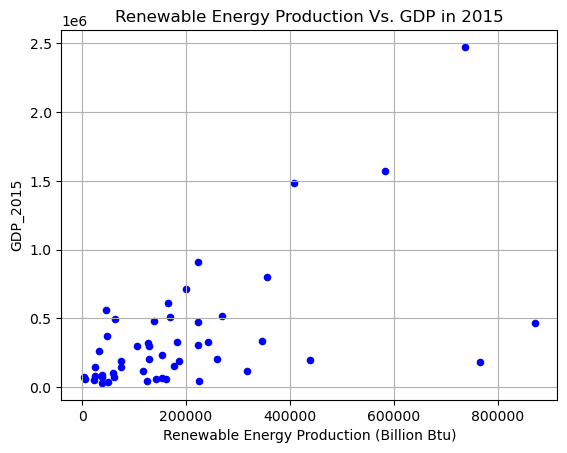

In [7]:
production_years = json_normalize(production_response["response"]['data'])

production_2015 = production_years.loc[production_years["period"] == 2015, :]

clean_production = production_2015[['stateDescription', 'value']]
clean_production = clean_production.rename(columns={'stateDescription': 'States', 'value': 'Renewable Energy Production (Billion Btu)'})
clean_production = clean_production.set_index(['States'])

production_summary = pd.merge(clean_production, gdp_df, on=["States"])
production_summary = production_summary.drop("United States")
production_summary = production_summary.drop("District of Columbia")

production_plot = production_summary.plot.scatter(x = 'Renewable Energy Production (Billion Btu)',
                                                  y = 'GDP_2015',
                                                  title="Renewable Energy Production Vs. GDP in 2015",
                                                  grid=True,
                                                  c = 'blue')
production_plot

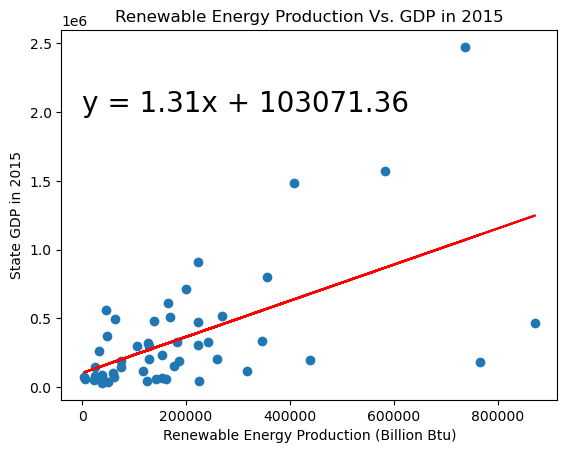

r:0.5722


In [8]:
plt.xlabel("Renewable Energy Production (Billion Btu)")
plot_linear_regression(production_summary["Renewable Energy Production (Billion Btu)"], production_summary["GDP_2015"], 'Renewable Energy Production Vs. GDP in 2015', 'State GDP in 2015', (0,2000000))

In [9]:
correlation_production_gdp = st.pearsonr(production_summary['Renewable Energy Production (Billion Btu)'], production_summary['GDP_2015'])
correlation_production_gdp

PearsonRResult(statistic=0.5721795097427935, pvalue=1.4174158398612698e-05)

<Axes: title={'center': 'Renewable Energy Total Consumption Vs. GDP in 2015'}, xlabel='Renewable Energy Total Consumption (Billion Btu)', ylabel='GDP_2015'>

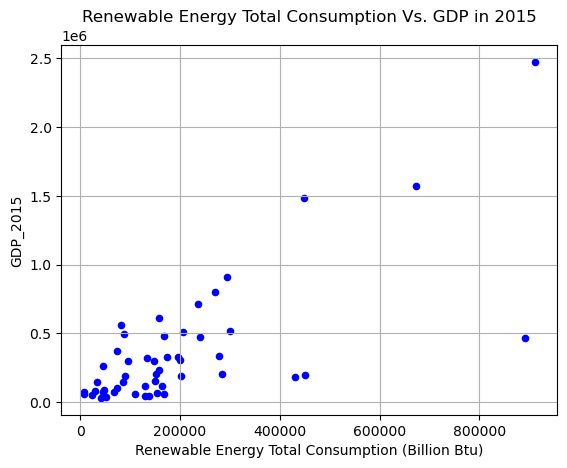

In [10]:
consumption_years = json_normalize(consumption_response["response"]['data'])

consumption_2015 = consumption_years.loc[consumption_years["period"] == 2015, :]

clean_consumption = consumption_2015[['stateDescription', 'value']]
clean_consumption = clean_consumption.rename(columns={'stateDescription': 'States', 'value': 'Renewable Energy Total Consumption (Billion Btu)'})
clean_consumption = clean_consumption.set_index(['States'])

consumption_summary = pd.merge(clean_consumption, gdp_df, on=["States"])
consumption_summary = consumption_summary.drop("United States")
consumption_summary = consumption_summary.drop("District of Columbia")

consumption_plot = consumption_summary.plot.scatter(x = 'Renewable Energy Total Consumption (Billion Btu)',
                                                    y = 'GDP_2015',
                                                    title="Renewable Energy Total Consumption Vs. GDP in 2015",
                                                    grid=True,
                                                    c = 'blue')
consumption_plot

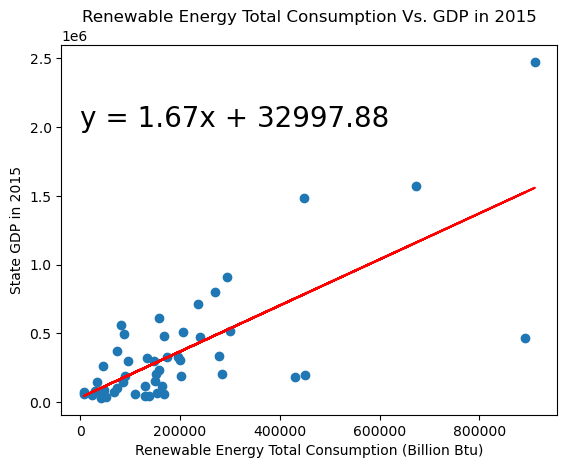

r:0.7284


In [11]:
plt.xlabel("Renewable Energy Total Consumption (Billion Btu)")
plot_linear_regression(consumption_summary["Renewable Energy Total Consumption (Billion Btu)"], consumption_summary["GDP_2015"], 'Renewable Energy Total Consumption Vs. GDP in 2015', 'State GDP in 2015', (0,2000000))

In [12]:
correlation_consumption_gdp = st.pearsonr(consumption_summary['Renewable Energy Total Consumption (Billion Btu)'], consumption_summary['GDP_2015'])
correlation_consumption_gdp

PearsonRResult(statistic=0.7283583812955918, pvalue=2.0344602781395633e-09)

<Axes: title={'center': 'Renewable Energy Production Vs. GDP/CO2 Emissions in 2015'}, xlabel='Renewable Energy Production (Billion Btu)', ylabel='GDP to CO2'>

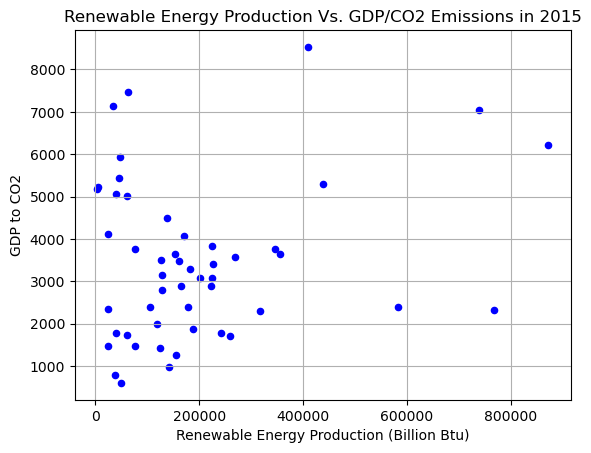

In [13]:
gdp_co2_summary = pd.merge(clean_production, gdp_co2_df, on=["States"])


gdp_co2_plot = gdp_co2_summary.plot.scatter(x = 'Renewable Energy Production (Billion Btu)',
                                            y = 'GDP to CO2',
                                            title="Renewable Energy Production Vs. GDP/CO2 Emissions in 2015",
                                            grid=True,
                                            c = 'blue')
gdp_co2_plot

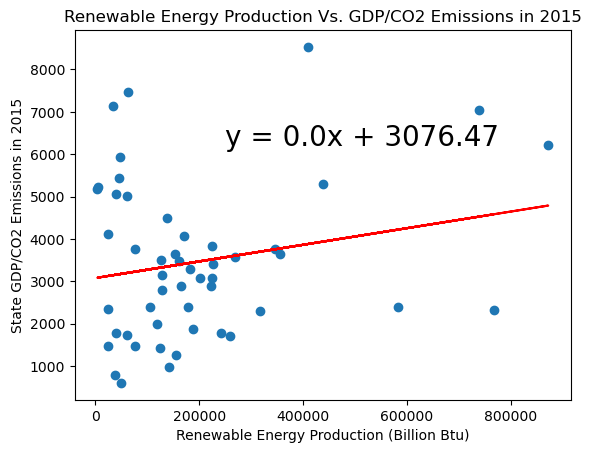

r:0.2079


In [14]:
plt.xlabel("Renewable Energy Production (Billion Btu)")
plot_linear_regression(gdp_co2_summary["Renewable Energy Production (Billion Btu)"], gdp_co2_summary["GDP to CO2"], 'Renewable Energy Production Vs. GDP/CO2 Emissions in 2015', 'State GDP/CO2 Emissions in 2015', (250000,6200))

In [15]:
production_correlation = st.pearsonr(gdp_co2_summary['Renewable Energy Production (Billion Btu)'], gdp_co2_summary['GDP to CO2'])
production_correlation

PearsonRResult(statistic=0.20794271302706174, pvalue=0.14731507397447507)

<Axes: title={'center': 'Renewable Energy Total Consumption Vs. GDP/CO2 Emissions in 2015'}, xlabel='Renewable Energy Total Consumption (Billion Btu)', ylabel='GDP to CO2'>

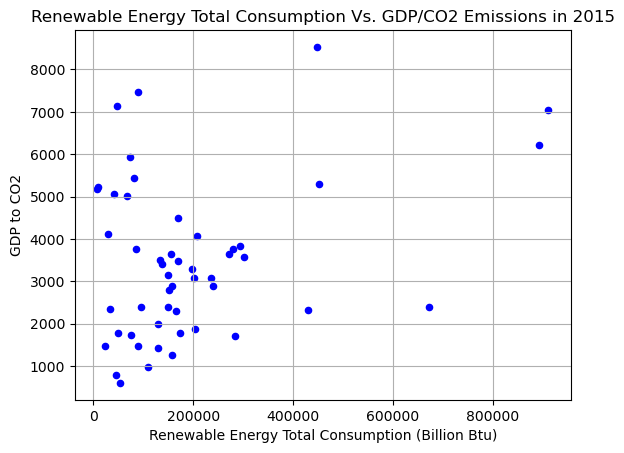

In [16]:
consumption_gdp_co2 = pd.merge(clean_consumption, gdp_co2_df, on=["States"])

consumption_gdp_co2_plot = consumption_gdp_co2.plot.scatter(x = 'Renewable Energy Total Consumption (Billion Btu)',
                                                            y = 'GDP to CO2',
                                                            title="Renewable Energy Total Consumption Vs. GDP/CO2 Emissions in 2015",
                                                            grid=True,
                                                            c = 'blue')
consumption_gdp_co2_plot

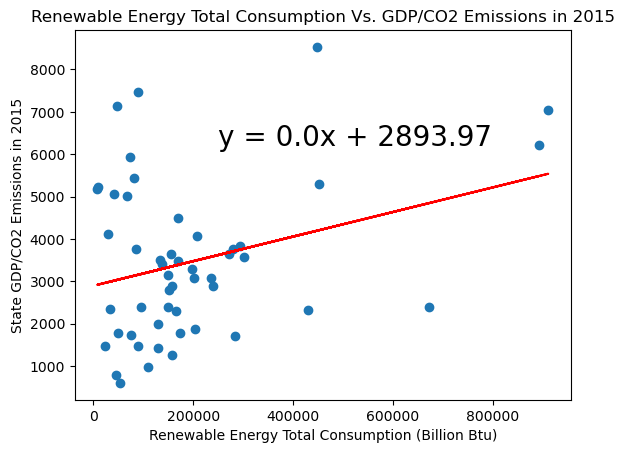

r:0.3069


In [17]:
plt.xlabel("Renewable Energy Total Consumption (Billion Btu)")
plot_linear_regression(consumption_gdp_co2["Renewable Energy Total Consumption (Billion Btu)"], consumption_gdp_co2["GDP to CO2"], 'Renewable Energy Total Consumption Vs. GDP/CO2 Emissions in 2015', 'State GDP/CO2 Emissions in 2015', (250000,6200))

In [18]:
consumption_correlation = st.pearsonr(consumption_gdp_co2['Renewable Energy Total Consumption (Billion Btu)'], consumption_gdp_co2['GDP to CO2'])
consumption_correlation

PearsonRResult(statistic=0.30692140831602327, pvalue=0.030159056872829722)

In [19]:
solar = requests.get(solar_consumption).json()
print(json.dumps(solar, indent=4, sort_keys=True))

{
    "apiVersion": "2.1.4",
    "request": {
        "command": "/v2/seds/data/",
        "params": {
            "api_key": "ZPF1jah8ffGyCfFkuZ7eymimZsvCzcLkxVdB2Mk3",
            "data": [
                "value"
            ],
            "facets": {
                "seriesId": [
                    "SOTCB"
                ],
                "stateId": [
                    "AK",
                    "AL",
                    "AR",
                    "AZ",
                    "CA",
                    "CO",
                    "CT",
                    "DE",
                    "FL",
                    "GA",
                    "HI",
                    "IA",
                    "ID",
                    "IL",
                    "IN",
                    "KS",
                    "KY",
                    "LA",
                    "MA",
                    "MD",
                    "ME",
                    "MI",
                    "MN",
                    "MO",
               

In [20]:
coal = requests.get(coal_consumption).json()
print(json.dumps(coal, indent=4, sort_keys=True))

{
    "apiVersion": "2.1.4",
    "request": {
        "command": "/v2/seds/data/",
        "params": {
            "api_key": "ZPF1jah8ffGyCfFkuZ7eymimZsvCzcLkxVdB2Mk3",
            "data": [
                "value"
            ],
            "facets": {
                "seriesId": [
                    "CLTCB"
                ],
                "stateId": [
                    "AK",
                    "AL",
                    "AR",
                    "AZ",
                    "CA",
                    "CO",
                    "CT",
                    "DE",
                    "FL",
                    "GA",
                    "HI",
                    "IA",
                    "ID",
                    "IL",
                    "IN",
                    "KS",
                    "KY",
                    "LA",
                    "MA",
                    "MD",
                    "ME",
                    "MI",
                    "MN",
                    "MO",
               

<Axes: title={'center': 'Solar Energy Total Consumption Vs. GDP in 2015'}, xlabel='Solar Energy Total Consumption (Billion Btu)', ylabel='GDP_2015'>

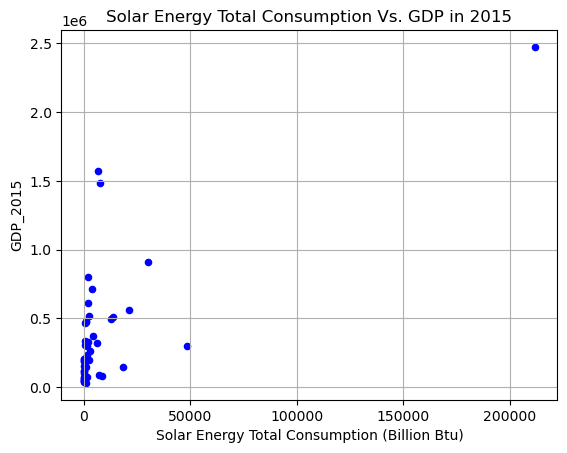

In [21]:
solar_years = json_normalize(solar["response"]['data'])

solar_2015 = solar_years.loc[solar_years["period"] == 2015, :]

solar_usage = solar_2015[['stateDescription', 'value']]
solar_usage = solar_usage.rename(columns={'stateDescription': 'States', 'value': 'Solar Energy Total Consumption (Billion Btu)'})
solar_usage = solar_usage.set_index(['States'])

solar_summary = pd.merge(solar_usage, gdp_df, on=["States"])


solar_plot = solar_summary.plot.scatter(x = 'Solar Energy Total Consumption (Billion Btu)',
                                        y = 'GDP_2015',
                                        title="Solar Energy Total Consumption Vs. GDP in 2015",
                                        grid=True,
                                        c = 'blue')
solar_plot

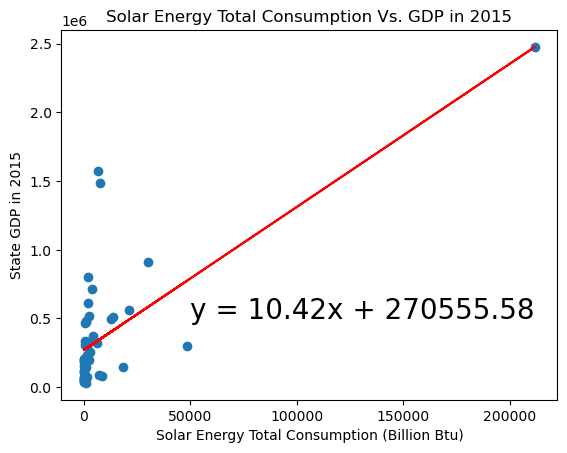

r:0.7122


In [22]:
plt.xlabel("Solar Energy Total Consumption (Billion Btu)")
plot_linear_regression(solar_summary["Solar Energy Total Consumption (Billion Btu)"], solar_summary["GDP_2015"], 'Solar Energy Total Consumption Vs. GDP in 2015', 'State GDP in 2015', (50000,500000))

In [23]:
solar_gdp = st.pearsonr(solar_summary['Solar Energy Total Consumption (Billion Btu)'], solar_summary['GDP_2015'])
solar_gdp

PearsonRResult(statistic=0.7122001778784925, pvalue=6.6352751081690764e-09)

<Axes: title={'center': 'Solar Energy Total Consumption Vs. GDP/CO2 Emissions in 2015'}, xlabel='Solar Energy Total Consumption (Billion Btu)', ylabel='GDP to CO2'>

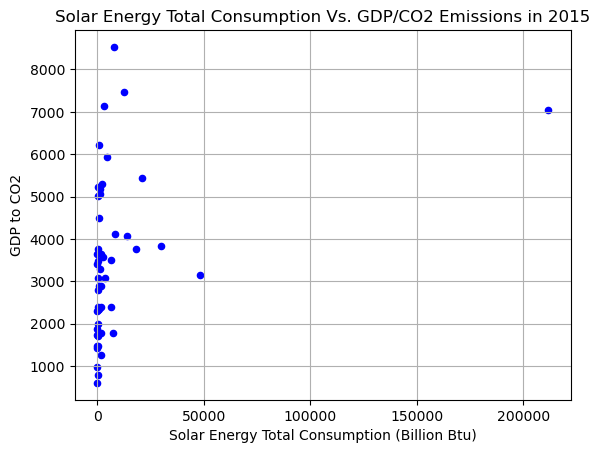

In [24]:
solar_co2_summary = pd.merge(solar_usage, gdp_co2_df, on=["States"])

solar_co2_plot = solar_co2_summary.plot.scatter(x = 'Solar Energy Total Consumption (Billion Btu)',
                                                y = 'GDP to CO2',
                                                title="Solar Energy Total Consumption Vs. GDP/CO2 Emissions in 2015",
                                                grid=True,
                                                c = 'blue')
solar_co2_plot

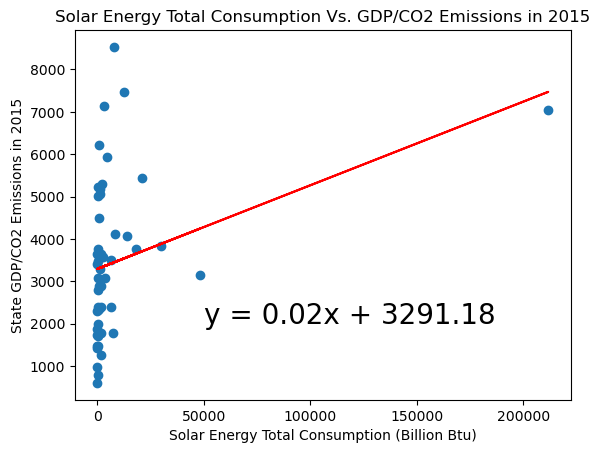

r:0.3282


In [25]:
plt.xlabel("Solar Energy Total Consumption (Billion Btu)")
plot_linear_regression(solar_co2_summary["Solar Energy Total Consumption (Billion Btu)"], solar_co2_summary["GDP to CO2"], 'Solar Energy Total Consumption Vs. GDP/CO2 Emissions in 2015', 'State GDP/CO2 Emissions in 2015', (50000,2000))

In [26]:
solar_gdp_co2 = st.pearsonr(solar_co2_summary['Solar Energy Total Consumption (Billion Btu)'], solar_co2_summary['GDP to CO2'])
solar_gdp_co2

PearsonRResult(statistic=0.3281583918963058, pvalue=0.019987798947970443)

<Axes: title={'center': 'Solar Energy Total Consumption Vs. GDP/CO2 Emissions in 2015'}, xlabel='Solar Energy Total Consumption (Billion Btu)', ylabel='GDP to CO2'>

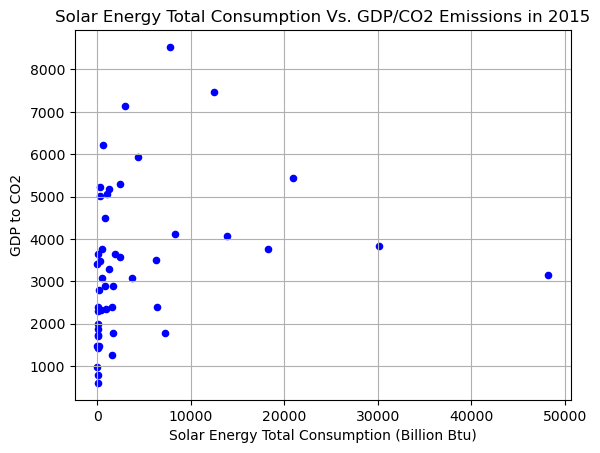

In [27]:
solar_co2_summary = solar_co2_summary.drop('California')
solar_co2_outlier = solar_co2_summary.plot.scatter(x = 'Solar Energy Total Consumption (Billion Btu)',
                                                   y = 'GDP to CO2',
                                                   title="Solar Energy Total Consumption Vs. GDP/CO2 Emissions in 2015",
                                                   grid=True,
                                                   c = 'blue')
solar_co2_outlier

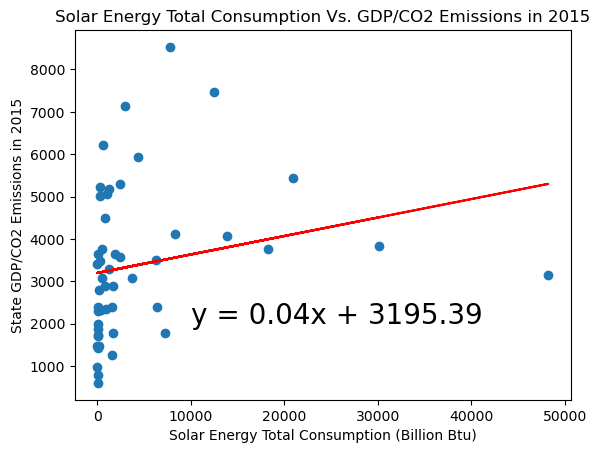

r:0.2161


In [28]:
plt.xlabel("Solar Energy Total Consumption (Billion Btu)")
plot_linear_regression(solar_co2_summary["Solar Energy Total Consumption (Billion Btu)"], solar_co2_summary["GDP to CO2"], 'Solar Energy Total Consumption Vs. GDP/CO2 Emissions in 2015', 'State GDP/CO2 Emissions in 2015', (10000,2000))

In [29]:
solar_outlier = st.pearsonr(solar_co2_summary['Solar Energy Total Consumption (Billion Btu)'], solar_co2_summary['GDP to CO2'])
solar_outlier

PearsonRResult(statistic=0.2160611531293707, pvalue=0.13594590878394275)

<Axes: title={'center': 'Coal Total Consumption Vs. GDP in 2015'}, xlabel='Coal Total Consumption (Billion Btu)', ylabel='GDP_2015'>

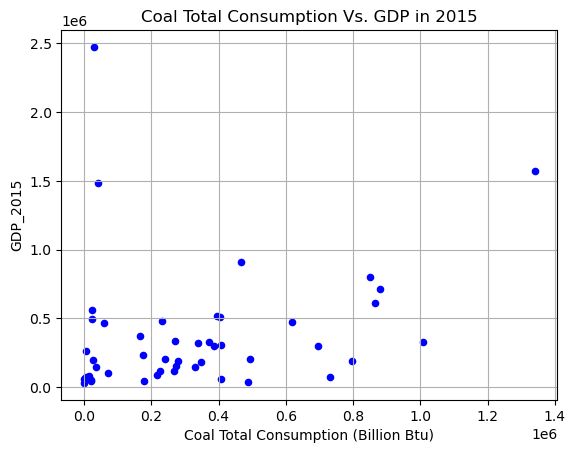

In [30]:
coal_years = json_normalize(coal["response"]['data'])

coal_2015 = coal_years.loc[coal_years["period"] == 2015, :]

coal_usage = coal_2015[['stateDescription', 'value']]
coal_usage = coal_usage.rename(columns={'stateDescription': 'States', 'value': 'Coal Total Consumption (Billion Btu)'})
coal_usage = coal_usage.set_index(['States'])

coal_summary = pd.merge(coal_usage, gdp_df, on=["States"])


coal_plot = coal_summary.plot.scatter(x = 'Coal Total Consumption (Billion Btu)',
                                      y = 'GDP_2015',
                                      title="Coal Total Consumption Vs. GDP in 2015",
                                      grid=True,
                                      c = 'blue')
coal_plot

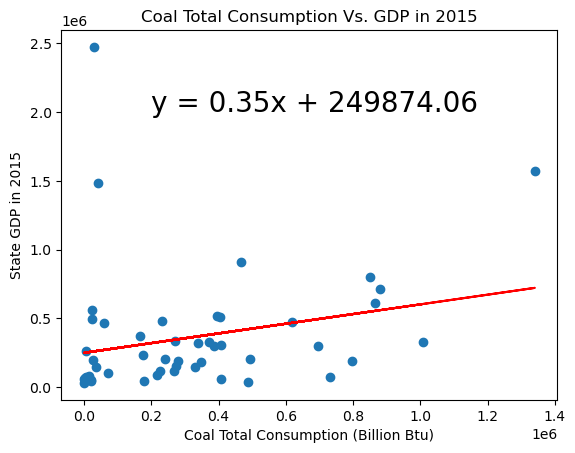

r:0.2476


In [31]:
plt.xlabel("Coal Total Consumption (Billion Btu)")
plot_linear_regression(coal_summary["Coal Total Consumption (Billion Btu)"], coal_summary["GDP_2015"], 'Coal Total Consumption Vs. GDP in 2015', 'State GDP in 2015', (200000,2000000))

In [32]:
coal_gdp = st.pearsonr(coal_summary['Coal Total Consumption (Billion Btu)'], coal_summary['GDP_2015'])
coal_gdp

PearsonRResult(statistic=0.2475595487928201, pvalue=0.08303720216978787)

<Axes: title={'center': 'Coal Total Consumption Vs. GDP/CO2 Emissions in 2015'}, xlabel='Coal Total Consumption (Billion Btu)', ylabel='GDP to CO2'>

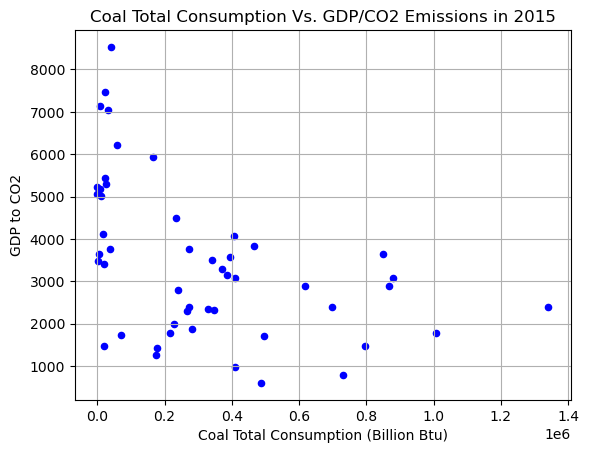

In [33]:
coal_co2_summary = pd.merge(coal_usage, gdp_co2_df, on=["States"])


coal_co2_plot = coal_co2_summary.plot.scatter(x = 'Coal Total Consumption (Billion Btu)',
                                              y = 'GDP to CO2',
                                              title="Coal Total Consumption Vs. GDP/CO2 Emissions in 2015",
                                              grid=True,
                                              c = 'blue')
coal_co2_plot

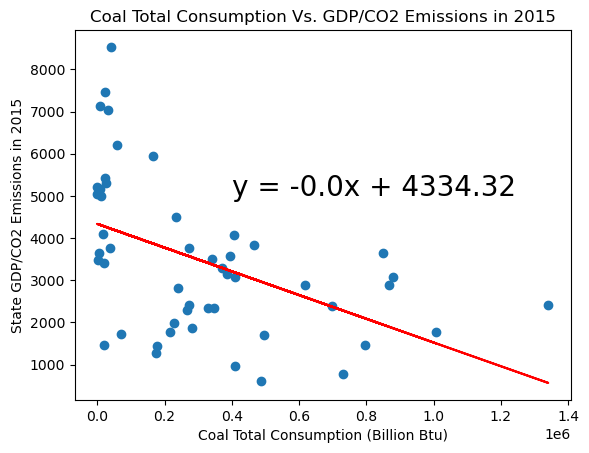

r:-0.4810


In [34]:
plt.xlabel("Coal Total Consumption (Billion Btu)")
plot_linear_regression(coal_co2_summary["Coal Total Consumption (Billion Btu)"], coal_co2_summary["GDP to CO2"], 'Coal Total Consumption Vs. GDP/CO2 Emissions in 2015', 'State GDP/CO2 Emissions in 2015', (400000,5000))

In [35]:
coal_gdp_co2 = st.pearsonr(coal_co2_summary['Coal Total Consumption (Billion Btu)'], coal_co2_summary['GDP to CO2'])
coal_gdp_co2

PearsonRResult(statistic=-0.4809830348136016, pvalue=0.00040664207359578444)